In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf
from joblib import dump, load


# 读取数据，构造训练集和测试集

In [2]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data_10class.npy')
    y = np.load('train_data/label_10class.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num


In [3]:

def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(50)
    # !!!一定要设置随机种子，否则每次生成的数据集都是不一样的，训练结果会大幅降低
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val


# 读取数据

In [215]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
# # 从val_data和val_label中拿出最后1个元素作为测试组
# test_data = val_data[-1:]
# test_label = val_label[-1:]
# 
# # 移除val_data和val_label中的最后1个元素
# val_data = val_data[:-1]
# val_label = val_label[:-1]
print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# print("测试组数量：",len(test_label))

类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [216]:
print(train_data[600][0])

[0.44493455 0.00972973 0.09863941 0.4557373 ]



# 数据集构建

In [6]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])
# m_test = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])
# 设置训练迭代次数
epoch = 20

NameError: name 'train_data' is not defined


# 随机森林

In [4]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize


In [5]:

## 模型训练
# 模型参数设置
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5)

# 模型准确率和损失值
acc_list = []
# loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1, epoch + 1):
    # 模型训练
    rfc.fit(m_train, train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val), dtype='int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred), 3)

    # 训练集
    y_pred = np.asarray(rfc.predict(m_train), dtype='int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred), 3)
 
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)

    # 计算损失值
    # 使用one-hot编码计算损失值
    # noe_hot = OneHotEncoder(sparse_output=False)
    # 
    # y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    # val_label_o = noe_hot.fit_transform(train_label.reshape(1, -1))

    # loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",loss)
    # loss_list.append(loss)
    print("完成第", i, "轮训练，测试集准确率：", acc)

开始训练


NameError: name 'epoch' is not defined

## 测试集得分

In [220]:
y_pred = np.asarray(rfc.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

result=classification_report(val_label, y_pred,output_dict=True)
rfc_info={}
rfc_info['accuracy']=result['accuracy']
rfc_info['precision']=result['macro avg']['precision']
rfc_info['recall']=result['macro avg']['recall']
rfc_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.937
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       144
           1       1.00      1.00      1.00       150
           2       0.83      0.82      0.83       157
           3       0.98      0.99      0.98       158
           4       0.99      0.93      0.96       164
           5       1.00      1.00      1.00       143
           6       0.75      0.85      0.80       158
           7       1.00      1.00      1.00       132
           8       0.99      0.92      0.95       156
           9       0.93      1.00      0.97       138

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500




## 模型迭代准确率

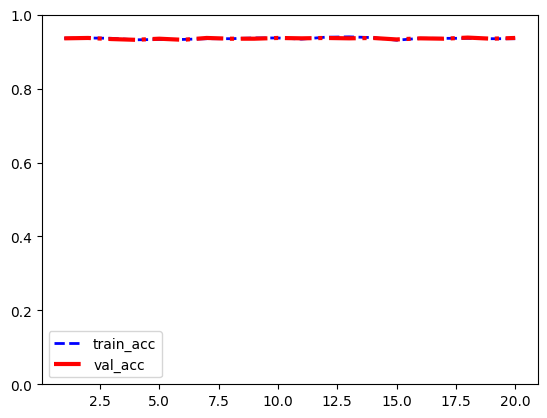

In [221]:
# 设置Y轴范围
plt.ylim(0, 1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1, len(show_data1) + 1))
ln1, = plt.plot(x_data, show_data1, color='blue', linewidth=2.0, linestyle='--')
ln2, = plt.plot(x_data, show_data2, color='red', linewidth=3.0, linestyle='-.')
plt.legend(handles=[ln1, ln2], labels=['train_acc', 'val_acc'])
plt.show()

## 保存模型

In [222]:

# 保存模型
dump(rfc, 'models_save/rfc_10class.joblib')
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc_10class.joblib']

# SVM

In [223]:
from sklearn import svm  # 引入SVM库

# 读取数据

In [224]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])

类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [225]:

# 模型参数设置
svm_model = svm.SVC(kernel='poly', gamma='scale', probability=True, coef0=1,degree=3,C=7)  # SVM模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
# for i in range(1, epoch + 1):
# 模型训练
svm_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(svm_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(svm_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成SVM训练，测试集准确率：", acc)

开始训练
完成SVM训练，测试集准确率： 0.933


In [226]:
y_pred_final = np.asarray(svm_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
svm_info={}
svm_info['accuracy']=result['accuracy']
svm_info['precision']=result['macro avg']['precision']
svm_info['recall']=result['macro avg']['recall']
svm_info['f1-score']=result['macro avg']['f1-score']


------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.933
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       144
           1       1.00      1.00      1.00       150
           2       0.80      0.85      0.82       157
           3       0.95      0.99      0.97       158
           4       0.99      0.96      0.98       164
           5       1.00      1.00      1.00       143
           6       0.80      0.84      0.81       158
           7       1.00      1.00      1.00       132
           8       0.99      0.88      0.93       156
           9       0.90      1.00      0.95       138

    accuracy                           0.93      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.93      0.93      1500



# 保存模型

In [227]:
dump(svm_model, 'models_save/svm_10class.joblib')
# # 加载
# svm = load('models_save/svm.joblib')
# print(svm)

['models_save/svm_10class.joblib']

# Gaussian Naive Bayes

In [228]:
from sklearn.naive_bayes import GaussianNB

# 读取数据

In [229]:
data, label, label_count = load_data()
# 生成训练集测试集，70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*"*10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))


类别数量为： 10
训练集shape (3500, 1, 4)
训练集类别： Counter({7: 368, 9: 362, 5: 357, 0: 356, 1: 350, 8: 344, 2: 343, 6: 342, 3: 342, 4: 336})
测试集shape (1500, 1, 4)
测试集类别： Counter({4: 164, 3: 158, 6: 158, 2: 157, 8: 156, 1: 150, 0: 144, 5: 143, 9: 138, 7: 132})
**********
训练集数量： 3500
测试集数量： 1500


In [230]:
# 模型参数设置
gnb_model = GaussianNB()  # Gaussian Naive Bayes 模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")

# 模型训练
gnb_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(gnb_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
# y_pred_train = np.asarray(gnb_model.predict(m_train), dtype='int64')
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
# train_acc_list.append(train_acc)

print("完成训练，测试集准确率：", acc)

开始训练
完成训练，测试集准确率： 0.933


In [231]:
y_pred_final = np.asarray(gnb_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final,zero_division=0))

result=classification_report(val_label, y_pred,output_dict=True,zero_division=0)
gb_info={}
gb_info['accuracy']=result['accuracy']
gb_info['precision']=result['macro avg']['precision']
gb_info['recall']=result['macro avg']['recall']
gb_info['f1-score']=result['macro avg']['f1-score']

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.933
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       144
           1       1.00      1.00      1.00       150
           2       0.85      0.79      0.82       157
           3       0.98      0.99      0.99       158
           4       0.99      0.93      0.96       164
           5       1.00      1.00      1.00       143
           6       0.74      0.86      0.80       158
           7       1.00      1.00      1.00       132
           8       0.99      0.91      0.95       156
           9       0.93      1.00      0.96       138

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.94      0.93      0.93      1500



# 保存模型

In [232]:
dump(gnb_model, 'models_save/gnb_10class_thisisbad.joblib')

['models_save/gnb_10class_thisisbad.joblib']

# KNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier  

# 模型参数设置，选择KNN模型  

In [234]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # 你可以根据需要调整邻居的数量  

# 模型准确率列表  
acc_list = []  
train_acc_list = []  
print("开始训练")  
# 模型拟合  
knn_model.fit(m_train, train_label)  

# 测试集  
y_pred = knn_model.predict(m_val)  

# 计算准确率  
acc = round(accuracy_score(val_label, y_pred), 3)  

# 训练集  
# y_pred_train = knn_model.predict(m_train)  
# train_acc = round(accuracy_score(train_label, y_pred_train), 3)  

acc_list.append(acc)  
# train_acc_list.append(train_acc)  

print("完成训练，测试集准确率：", acc)  
print('------------------测试集上得分：------------------------')  
print('*' * 5)  
print('测试集准确率得分:', acc)  
print('*' * 5)  
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred,output_dict=False))  


result=classification_report(val_label, y_pred,output_dict=True)
knn_info={}
knn_info['accuracy']=result['accuracy']
knn_info['precision']=result['macro avg']['precision']
knn_info['recall']=result['macro avg']['recall']
knn_info['f1-score']=result['macro avg']['f1-score']


开始训练
完成训练，测试集准确率： 0.944
------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.944
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       144
           1       1.00      1.00      1.00       150
           2       0.84      0.86      0.85       157
           3       0.95      1.00      0.98       158
           4       0.98      0.98      0.98       164
           5       1.00      1.00      1.00       143
           6       0.85      0.87      0.86       158
           7       1.00      1.00      1.00       132
           8       0.99      0.90      0.94       156
           9       0.92      0.99      0.95       138

    accuracy                           0.94      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.94      0.94      0.94      1500



In [235]:
# 保存模型
dump(knn_model, 'models_save/knn_10class.joblib')

['models_save/knn_10class.joblib']

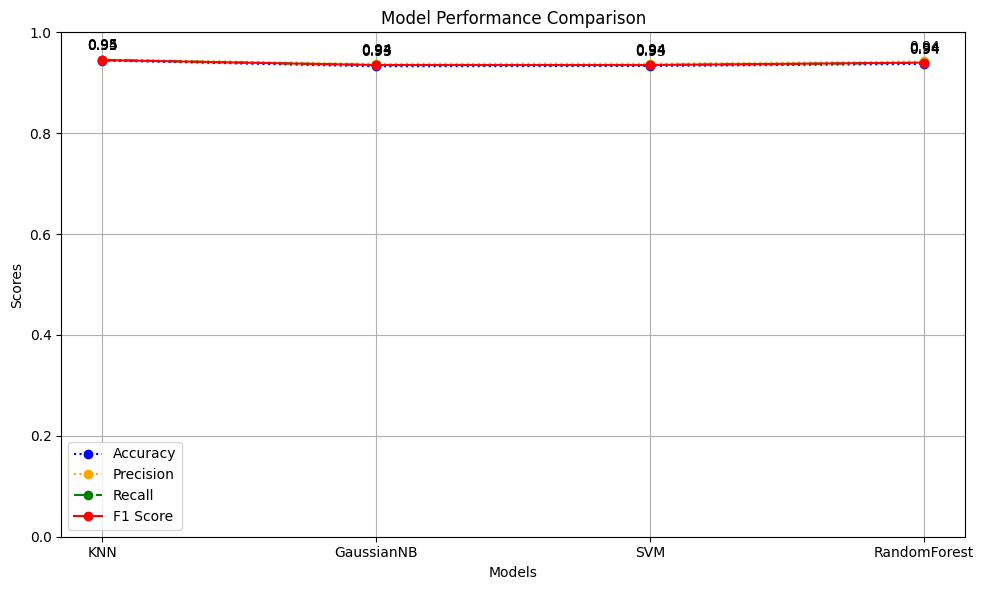

In [236]:
results = {'KNN':knn_info,'GaussianNB':gb_info,'SVM':svm_info,'RandomForest':rfc_info,}

model_names = list(results.keys())  
accuracy = [results[model]['accuracy'] for model in model_names]  
precision = [results[model]['precision'] for model in model_names]  
recall = [results[model]['recall'] for model in model_names]  
f1_score = [results[model]['f1-score'] for model in model_names]  

# 设置 X 轴位置  
x = np.arange(len(model_names))  

# 设置宽度  
width = 0.2  

# 创建图形和轴  
plt.figure(figsize=(10, 6))  

# 绘制折线图  
plt.plot(model_names, accuracy, marker='o', label='Accuracy', linestyle='dotted', color='blue')  
plt.plot(model_names, precision, marker='o', label='Precision', linestyle=':', color='orange')  
plt.plot(model_names, recall, marker='o', label='Recall', linestyle='-.', color='green')  
plt.plot(model_names, f1_score, marker='o', label='F1 Score', linestyle='-', color='red')  

# 添加标题和标签  
plt.title('Model Performance Comparison')  
plt.xlabel('Models')  
plt.ylabel('Scores')  
plt.ylim(0, 1)  

# 图例  
plt.legend()  

# 显示数值标签  
for i, (acc, prec, rec, f1) in enumerate(zip(accuracy, precision, recall, f1_score)):  
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')  
    plt.text(i, prec + 0.02, f'{prec:.2f}', ha='center')  
    plt.text(i, rec + 0.02, f'{rec:.2f}', ha='center')  
    plt.text(i, f1 + 0.02, f'{f1:.2f}', ha='center')  

# 显示图形  
plt.tight_layout()  
plt.grid()  
plt.show() 